Pip installations

In [1]:
!pip install laspy  
!pip install netcdf4 
! conda install -c conda-forge basemap -y

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [2]:
!pip install requests
!pip install xarray
!pip install geopandas
!pip install pyaxis
!pip install owslib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
#import data

import pandas as pd
import numpy as np
import requests
from requests.structures import CaseInsensitiveDict
from matplotlib import pyplot
import xarray as xr
import geopandas as gpd
import xarray as xr
import pyaxis
import owslib
import tempfile

import netCDF4 as nc 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import datetime

import os

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (5.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [72]:
#read csv files

df_csv = pd.read_csv('../github_data/csvs/CH2018_tas_MPICSC-REMO1_MPIESM_EUR11_RCP26_QMstations_1981-2099_BER.csv', skiprows=17, sep=';')
df_csv.head()

,DATE,VALUE
0,1981-01-01,-5.75
1,1981-01-02,-6.30
2,1981-01-03,-4.31
3,1981-01-04,-2.95
4,1981-01-05,-1.77


In [73]:
df_csv['DATE'] =  pd.to_datetime(df_csv['DATE'])
df_csv['Year'] = pd.DatetimeIndex(df_csv['DATE']).year
df_csv['Month'] = pd.DatetimeIndex(df_csv['DATE']).month
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43464 entries, 0 to 43463
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    43464 non-null  datetime64[ns]
 1   VALUE   43464 non-null  float64       
 2   Year    43464 non-null  int64         
 3   Month   43464 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.3 MB


<AxesSubplot:title={'center':'Average Temperature in Bern 1981 until 2099 best scenario'}, xlabel='Year'>

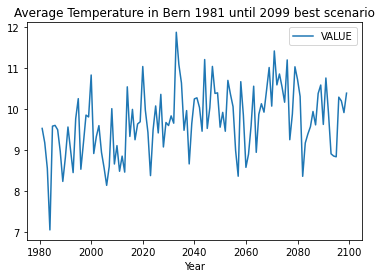

In [74]:
#temp through the years

df_csv.groupby('Year', as_index=False).agg({"VALUE": "mean"}).plot(x='Year', y='VALUE', title='Average Temperature in Bern 1981 until 2099 best scenario')

<AxesSubplot:title={'center':'Average Temperature in Bern July 1981 until 2099 best scenario'}, xlabel='Year'>

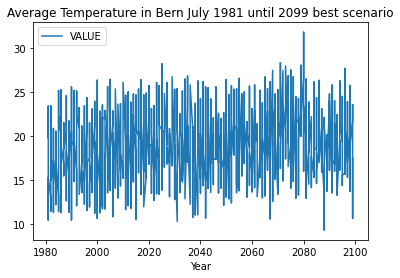

In [75]:
#in July
df_csv.loc[df_csv["Month"]==7].plot(x='Year', y='VALUE',title='Average Temperature in Bern July 1981 until 2099 best scenario')

In [5]:
#second csv read attempt
df_csv2 = pd.read_csv('../github_data/csvs/CH2018_pr_MPICSC-REMO1_MPIESM_EUR11_RCP26_QMstations_1981-2099_ABE.csv', encoding="ISO-8859-1", sep = ";")
df_csv2.head()

,TITLE,CH2018 bias-corrected and downscaled data (http://www.climate-scenarios.ch)
0,VARIABLE,Daily Precipitation Sum
1,UNIT,mm day-1
2,SIMULATION,MPICSC-REMO1-MPIESM-EUR11-RCP26
3,STATION,ABE Aarberg
4,LONGITUDE,7.2814


### READ NC

In [39]:
#read nc
source = 'netcdf/CH2018_pr_MPICSC-REMO1_MPIESM_EUR11_RCP26_QMstations_1981-2099_AIE.nc'

In [40]:
path_data = "../github_data/" # Your folder for data
directory = (path_data+source).replace("/"+source.split("/")[-1], "") # directory without file_name
file_name = source.split("/")[-1] # file_name
if not os.path.exists(directory):
    os.makedirs(directory) # if folder does not exist, create it
list_files = os.listdir(directory)

# ## Download the file if it does not exist in your folder
# if file_name not in list_files:
#     resp = requests.get(url +"/"+source)
#     print("start download")
#     with open(path_data + source, 'wb') as f:
#         f.write(resp.content)
#     print("finally downloaded")

        
temperature_ds = nc.Dataset(directory + "/" + file_name)

In [41]:
print(temperature_ds)
print(temperature_ds["pr"])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: CH2018 bias-corrected and downscaled data
    project: CH2018 - New Climate Scenarios for Switzerland (http://www.climate-scenarios.ch)
    institution: The CH2018 Consortium (MeteoSwiss, ETH Zurich, C2SM, University of Bern, scnat) and the National Centre for Climate Services NCCS (http://www.nccs.ch)
    creator_name: Sven Kotlarski (MeteoSwiss), sven.kotlarski@meteoswiss.ch
    license: https://creativecommons.org/licenses/by/4.0
    frequency: day
    spatial: station
    CORDEX_RCM: MPICSC-REMO1
    CORDEX_GCM: MPIESM
    CORDEX_DOMAIN: EUR11
    CORDEX_SCENARIO: RCP26
    station_name: Affoltern i. E.
    nat_abbr: AIE
    latitude: 47.06312222222222
    longitude: 7.74060833333333
    x_coord: 622940.0
    y_coord: 212500.0
    station_height: 755.0
    version: 1.0.0
    creation_date: Thu Nov  8 17:33:23 CET 2018
    references: [1] CH2018 (2018) CH2018 - Climate Scenari

In [42]:
# The date format in the nc file is number of days since 01.01.1900
print(temperature_ds["time"])

time_epoch = datetime.datetime(year=1900, month=1, day=1)

date_2018_08_01 = datetime.datetime(year=2018, month=8, day=1, hour=12)
delta_2018_08_01_since_epoch = (date_2018_08_01 - time_epoch) / datetime.timedelta(days=1) # divide to get the fraction

temp_first_aug = temperature_ds["pr"]["time"==delta_2018_08_01_since_epoch]
print(type(temp_first_aug))

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: days since 1900-01-01 00:00:00
    long_name: time
    axis: T
    calendar: standard
unlimited dimensions: 
current shape = (43464,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'numpy.ma.core.MaskedArray'>


In [43]:
lat = temperature_ds["lat"][:]
min_lat = np.min(lat)
max_lat = np.max(lat)
lon = temperature_ds["lon"][:]
min_lon = np.min(lon)
max_lon = np.max(lon)

plt.figure(figsize=(15, 10))
plt.title('Sum of Daily precipitation 1981-2099 RCP26 scenario')
swiss_map = Basemap(projection='merc', llcrnrlon=min_lon, llcrnrlat=min_lat, urcrnrlon=max_lon, urcrnrlat=max_lat, resolution=None)

swiss_map.readshapefile('shapefiles/CHE_adm1', 'cantons')

lons, lats = np.meshgrid(lon, lat)
x, y = swiss_map(lons, lats)

temp = swiss_map.contourf(x, y, temp_first_aug)
color_bar = swiss_map.colorbar(temp, "bottom")
color_bar.set_label("Projected Temperature [C]")

IndexError: lat not found in /

In [12]:
# function to read nc files

def read_plt_nc(source, type, title):
    path_data = "../github_data/" # Your folder for data
    directory = (path_data+source).replace("/"+source.split("/")[-1], "") # directory without file_name
    file_name = source.split("/")[-1] # file_name
    if not os.path.exists(directory):
        os.makedirs(directory) # if folder does not exist, create it
    list_files = os.listdir(directory)
            
    temperature_ds = nc.Dataset(directory + "/" + file_name)

    time_epoch = datetime.datetime(year=1900, month=1, day=1)

    date_2018_08_01 = datetime.datetime(year=2018, month=8, day=1, hour=12)
    delta_2018_08_01_since_epoch = (date_2018_08_01 - time_epoch) / datetime.timedelta(days=1) # divide to get the fraction

    temp_first_aug = temperature_ds[type]["time"==delta_2018_08_01_since_epoch]
    lat = temperature_ds["lat"][:]
    min_lat = np.min(lat)
    max_lat = np.max(lat)
    lon = temperature_ds["lon"][:]
    min_lon = np.min(lon)
    max_lon = np.max(lon)

    plt.figure(figsize=(15, 10))
    plt.title(title)
    swiss_map = Basemap(projection='merc', llcrnrlon=min_lon, llcrnrlat=min_lat, urcrnrlon=max_lon, urcrnrlat=max_lat, resolution=None)

    swiss_map.readshapefile('shapefiles/CHE_adm1', 'cantons')

    lons, lats = np.meshgrid(lon, lat)
    x, y = swiss_map(lons, lats)

    temp = swiss_map.contourf(x, y, temp_first_aug)
    color_bar = swiss_map.colorbar(temp, "bottom")
    color_bar.set_label("Projected Temperature [C]")

    

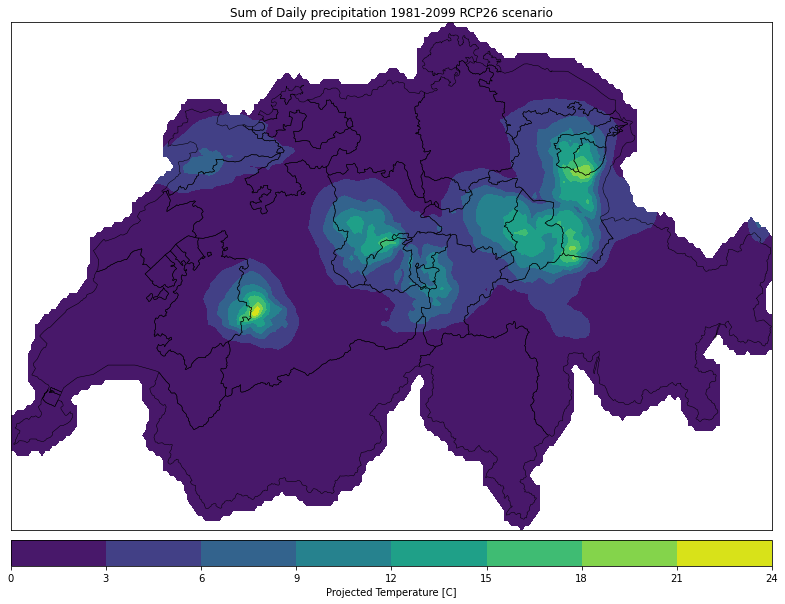

In [27]:
pr26 = 'nc_files/CH2018_pr_MPICSC-REMO1_MPIESM_EUR11_RCP26_QMgrid_1981-2099.nc'
read_plt_nc(pr26, 'pr' ,'Sum of Daily precipitation 1981-2099 RCP26 scenario')

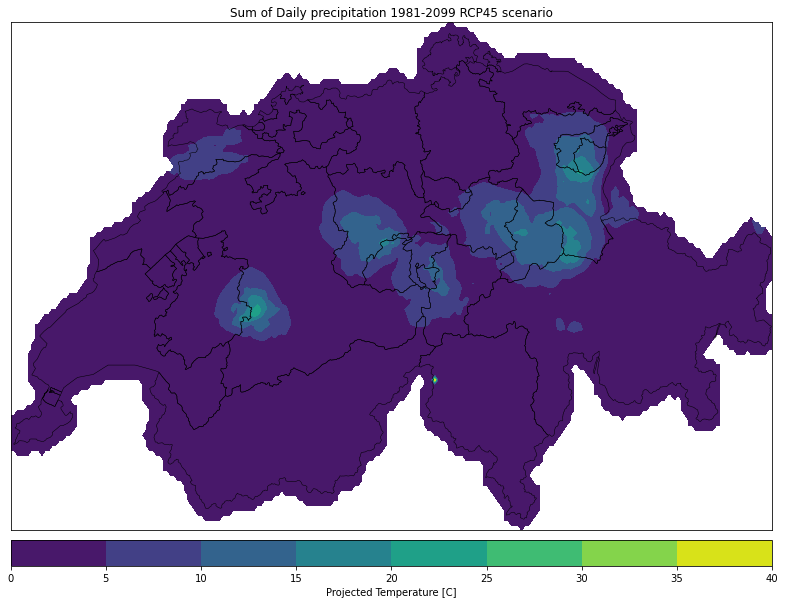

In [30]:
pr45 = 'nc_files/CH2018_pr_MPICSC-REMO1_MPIESM_EUR11_RCP45_QMgrid_1981-2099.nc'
read_plt_nc(pr45, 'pr', 'Sum of Daily precipitation 1981-2099 RCP45 scenario')

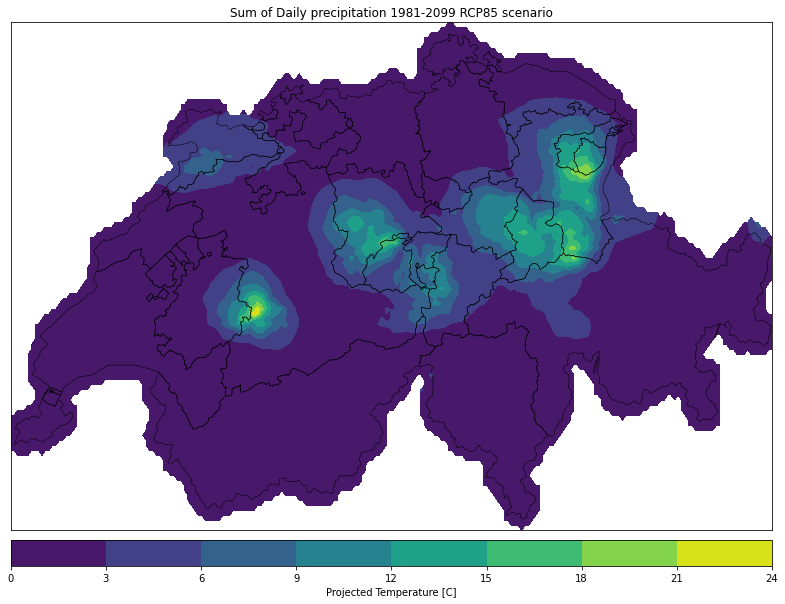

In [31]:
pr85 = 'nc_files/CH2018_pr_MPICSC-REMO1_MPIESM_EUR11_RCP85_QMgrid_1981-2099.nc'
read_plt_nc(pr85, 'pr','Sum of Daily precipitation 1981-2099 RCP85 scenario')

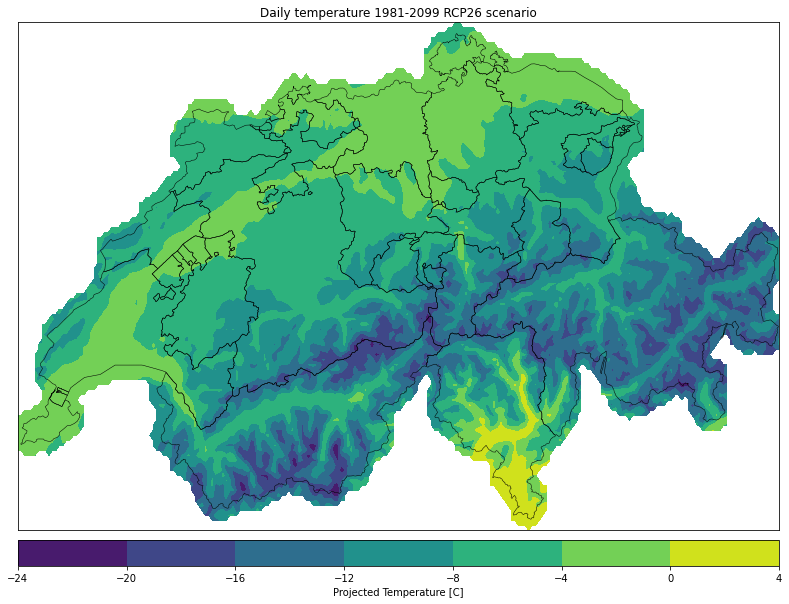

In [13]:
source1 = 'nc_files/CH2018_tasmax_MPICSC-REMO1_MPIESM_EUR11_RCP26_QMgrid_1981-2099.nc'
read_plt_nc(source1, 'tasmax', 'Daily temperature 1981-2099 RCP26 scenario')

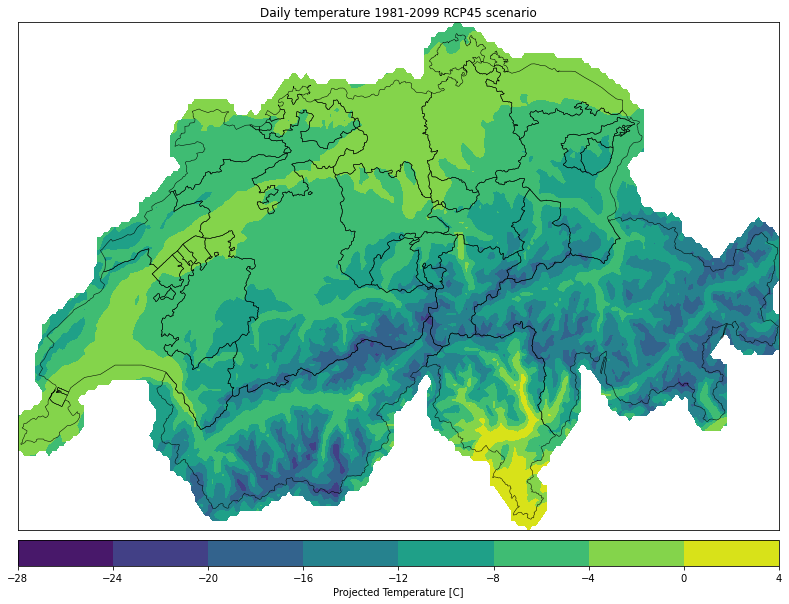

In [14]:
source2 = 'nc_files/CH2018_tasmax_MPICSC-REMO1_MPIESM_EUR11_RCP45_QMgrid_1981-2099.nc'
read_plt_nc(source2, 'tasmax', 'Daily temperature 1981-2099 RCP45 scenario')

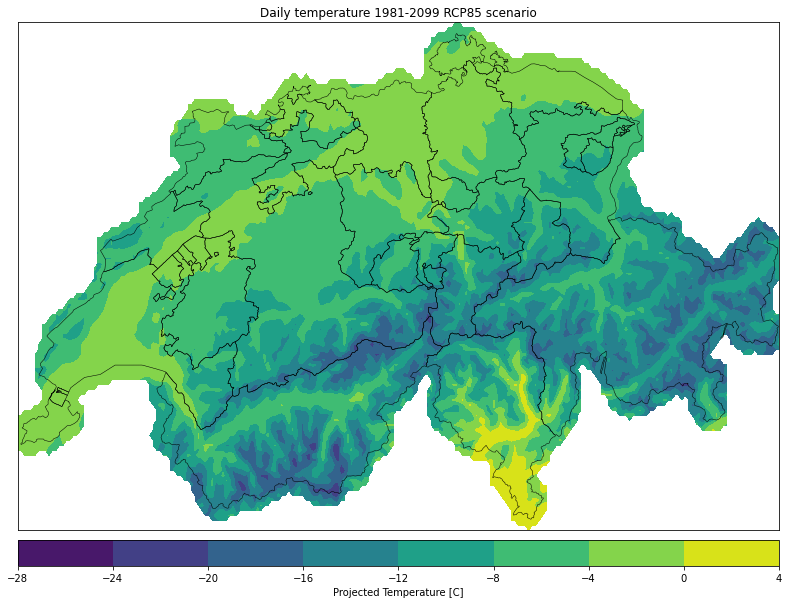

In [15]:
source3 = 'nc_files/CH2018_tasmax_MPICSC-REMO1_MPIESM_EUR11_RCP85_QMgrid_1981-2099.nc'
read_plt_nc(source3, 'tasmax', 'Daily temperature 1981-2099 RCP85 scenario')

### ANOTHER TYPE

In [47]:

#didn't work
ds = xr.open_dataset('../github_data/netcdf/CH2018_pr_MPICSC-REMO1_MPIESM_EUR11_RCP26_QMstations_1981-2099_AIE.nc', decode_times=False)
df_nc = ds.to_dataframe()

df_nc.head()


,pr
time,
29585.5,1.694924
29586.5,0.469916
29587.5,2.363527
29588.5,0.182944
29589.5,7.542946


In [49]:
# gdf = gpd.GeoDataFrame(
#     df_nc, geometry=gpd.points_from_xy(df_nc.lon, df_nc.lat))

# gdf.plot(column ="RnormY6190")